# Validation of the PyPSA-Africa Electric Demand

This notebooks investigates the data quality of the African electric consumption
data by comparing PyPSA, official Nigerian and Our World in Data (incl. BP & Ember).

To reproduce the findings obtained in this notebook,
please run the full snakemake workflow for the Africa.
To do so, please set ``countries = ["Africa"]`` in the ``config.yaml`` file.

Note. An unoptimized prepared network is sufficient for this notebook. 

## Preparation

### Import packages

In [1]:
# import packages

import logging
import os

import pypsa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

logger = logging.getLogger(__name__)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


### Set main directory to root folder

In [2]:
# change current directory to parent folder
import os
import sys

if not os.path.isdir("pypsa-earth"):
    os.chdir("../../..")
sys.path.append(os.getcwd()+"/pypsa-earth/scripts")
    
from _helpers import three_2_two_digits_country, two_2_three_digits_country

## 1. Load data 

#### Our World in Data
Retrieved from their GitHub: https://github.com/owid/energy-data/tree/master \
Web interface: https://ourworldindata.org/energy 

Our data sources:
- Energy consumption (primary energy, energy mix and energy intensity): this data is sourced from a combination of three sources—the BP Statistical Review of World Energy, the EIA and the SHIFT Data Portal.
- Electricity generation (electricity generation, and electricity mix): this data is sourced from a combination of three sources—the BP Statistical Review of World Energy, the Ember – Data Explorer and the Ember European Electricity Review.
- Other variables: this data is collected from a variety of sources (United Nations, World Bank, Gapminder, Maddison Project Database, etc.). More information is available in our codebook.


In [9]:
# url = "https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv"
url = "owid-energy-data.csv"
df = pd.read_csv(url)
df = df.loc[:, ["iso_code", "country", "year", "electricity_demand"]]
df = df[df["iso_code"].notna()]  # removes antartica
df["iso_code_2"] = df.loc[:, "iso_code"].apply(lambda x: three_2_two_digits_country(x))
electricity_demand_owid = df
electricity_demand_owid.tail(2)

ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not found in ISO3
ANT not fo

#### PyPSA network

Requires a solved or unsolved network.

In [10]:
solved_network_path = os.getcwd() + "/pypsa-earth/networks/eeap/elec_s_50_ec.nc"
pypsa_network = pypsa.Network(solved_network_path)
electricity_demand_pypsa = pypsa_network.loads_t.p_set
electricity_demand_pypsa.head(2)

/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
/Users/gbotemi/miniconda3/envs/pypsa-earth/lib/python3.10/site-packages/pypsa/components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas.

Load,CD2 0,CD3 0,CD5 0,CD6 0,CD7 0,EG1 0,EG1 1,EG1 10,EG1 11,EG1 12,EG1 13,EG1 14,EG1 15,EG1 16,EG1 17,EG1 18,EG1 19,EG1 2,EG1 20,EG1 21,EG1 22,EG1 23,EG1 24,EG1 3,EG1 4,EG1 5,EG1 6,EG1 7,EG1 8,EG1 9,ET9 0,ET9 1,ET9 2,ET9 3,ET9 4,ET9 5,ET9 6,KE0 0,LY1 0,LY1 1,LY1 2,LY4 0,RW10 0,SD13 0,SD14 0,SO11 0,SS15 0,TZ12 0,TZ8 0,UG10 0
snapshot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,259.190291,141.438210,204.777519,151.129636,22.662611,435.296450,986.659036,1441.103314,422.268357,775.118542,67.244212,697.228228,284.780787,1104.725769,46.230481,202.084861,2371.827063,2091.556965,57.831556,421.920066,630.050741,43.609655,16.220364,2438.815510,2541.709603,1085.119627,165.135363,1364.323968,2565.519282,1133.533623,6145.278350,594.749720,11.065506,206.780792,133.911951,282.813046,321.304004,1219.828740,1314.520373,2715.898819,326.896413,274.583433,1703.611212,1065.692337,350.321092,554.746062,180.135837,52.588636,780.737430,61.351195
2013-01-01 01:00:00,256.798948,140.133272,202.888199,149.735282,22.453521,431.626403,978.340372,1428.953166,418.708152,768.583407,66.677266,691.349797,282.379760,1095.411668,45.840705,200.469729,2351.829849,2073.922749,57.343970,418.362797,624.738693,43.241976,16.083607,2418.253508,2520.280086,1075.970828,163.743083,1352.821158,2543.889022,1123.976638,6293.315606,597.964191,11.122275,207.841632,134.598954,284.263951,322.911867,1230.985611,1269.114313,2622.086455,315.604783,265.098793,1735.735919,1069.866948,351.693396,568.258405,183.141309,55.808025,828.532887,63.160063


# 2. Validate

#### Steps:
- Align country coverage of dataframe
- Pick year of interest for 'Our World in Data'
- Align dataframe naming and temporal resolution
- Merge dataframe


Reduce "Our World in Data" to contain the same countries as PyPSA

In [13]:
country_in_network = (
    electricity_demand_pypsa.columns.to_frame()["Load"].apply(lambda x: x[0:2]).values
)
electricity_demand_owid_mini = electricity_demand_owid[
    electricity_demand_owid["iso_code_2"].isin(country_in_network)
]

Create total electric demand in TWh from OWID for year of interest

In [32]:
electricity_demand_owid_mini = electricity_demand_owid_mini[electricity_demand_owid_mini["year"] == 2020]

Create total electric demand in TWh from PyPSA for chosen demand year in `config.yaml`

In [33]:
# short the columns to only two digit (for groupby in next step)
electricity_demand_pypsa.columns = (
    electricity_demand_pypsa.columns.to_frame()["Load"].apply(lambda x: x[0:2]).values
)

Align PyPSA dataframe to 'Our World in Data'

In [37]:
import yaml

with open("pypsa-earth/config.yaml", "r") as file:
    config = yaml.safe_load(file)

df = electricity_demand_pypsa
df = pd.DataFrame(
    (df.sum().T.groupby([df.columns]).sum() / 10**6).round(2)
)  # MWh to TWh
df = df.reset_index()
df = df.rename(columns={0: "electricity_demand", "index": "iso_code_2"})
df["year"] = config["load_options"]["prediction_year"]
df["iso_code"] = df.loc[:, "iso_code_2"].apply(lambda x: two_2_three_digits_country(x))

map_dic = pd.Series(
    electricity_demand_owid_mini.country.values,
    index=electricity_demand_owid_mini.iso_code_2,
).to_dict()
df["country"] = df["iso_code_2"].map(map_dic)
electricity_demand_pypsa = df
electricity_demand_pypsa.head(2)

,iso_code_2,electricity_demand,year,iso_code,country
0,CD,9.05,2030,COD,Democratic Republic of Congo
1,EG,281.55,2030,EGY,Egypt


Merge dataframes

In [40]:
h = config["load_options"]["prediction_year"]
electricity_demand_pypsa["source"] = f"PyPSA {h}"
electricity_demand_owid_mini["source"] = f"Our World in Data {year_owid}"
df_merge = pd.concat([electricity_demand_pypsa, electricity_demand_owid_mini])

/var/folders/c3/657p__892k72qxh6r8fdkqsh0000gn/T/ipykernel_34580/2393989642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_demand_owid_mini["source"] = f"Our World in Data {year_owid}"


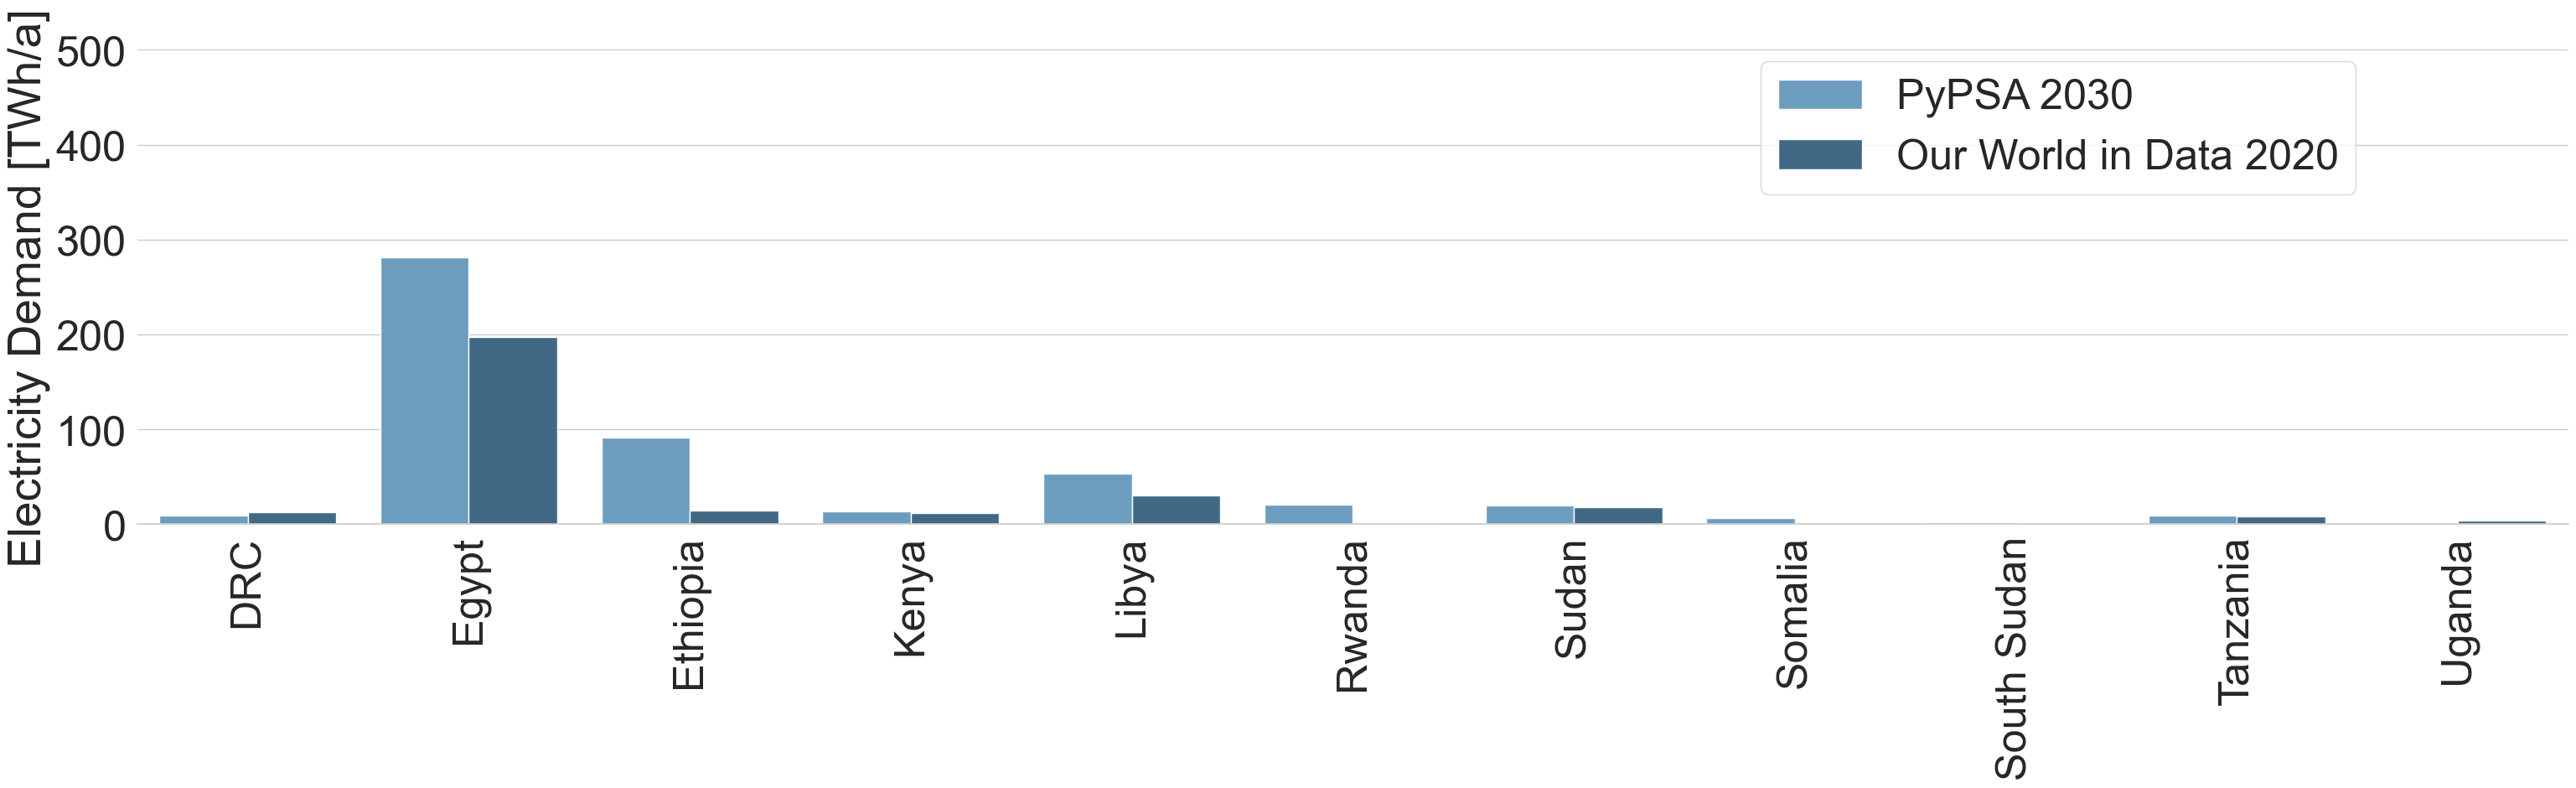

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=3.3)
ax = sns.catplot(
   x="country",
   y="electricity_demand",
   hue="source",
   data=df_merge,
   palette="Blues_d",
   kind="bar",
   height=8,
   aspect=4,
)

ax.set_xticklabels(rotation=90)
sns.move_legend(
   ax, "upper right", bbox_to_anchor=(0.75, 0.94), frameon=True, title=None
)
sns.despine(left=True, bottom=False)
ax.set(xlabel=None, ylabel="Electricity Demand [TWh/a]", ylim=(0, 500))
ax.savefig("demand-validation-part.pdf", bbox_inches='tight')

,source,electricity_demand
0,Our World in Data 2020,298.99
1,PyPSA 2030,509.36
0,IRENA 2030,831.20


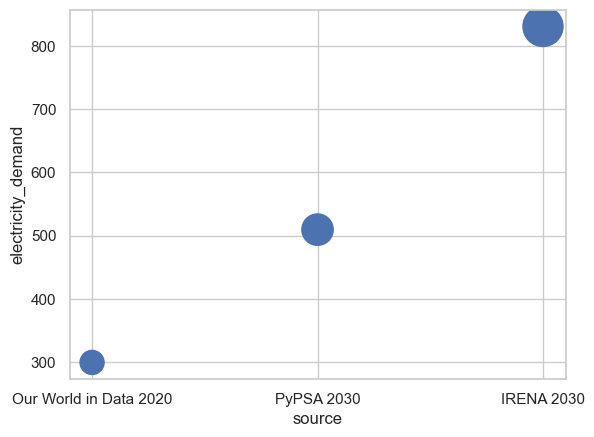

In [79]:
sns.set_theme(style="whitegrid", font_scale=1)

african_total_consumption = (
    df_merge.groupby(by="source").sum().drop(columns="year").reset_index()[["source", "electricity_demand"]]
)

# IRENA 2030 -> 95GW
# 95GW * 8760hr/year * 1e-3 -> 831.2
# https://www.ea-energianalyse.dk/wp-content/uploads/2021/06/Power-balance-statement-2020-ver-3.pdf
extra = pd.DataFrame(
    data={
        "source": ["IRENA 2030"],
        "electricity_demand": [831.2],
    }
)
# https://www.irena.org/-/media/Files/IRENA/Agency/Publication/2015/IRENA_Africa_2030_REmap_2015_low-res.pdf
# https://www.nature.com/articles/s41560-020-00755-9

african_total_consumption = pd.concat([african_total_consumption, extra])
african_total_consumption.plot.scatter(
    x="source", y="electricity_demand", s="electricity_demand"
)
african_total_consumption